In [ ]:
import tensorflow as tf
from tensorflow.keras import models,datasets,layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

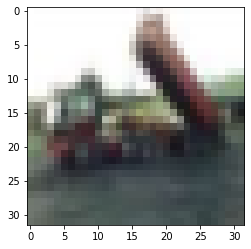

In [ ]:
plt.imshow(X_train[2
                   ])

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
classes = ["airplane",'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

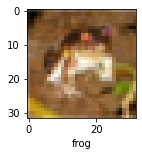

In [ ]:
plot_sample(X_train,y_train,0)

In [ ]:
X_train = X_train / 255
X_test = X_test /255

In [ ]:
 ann = models.Sequential([
       layers.Flatten(input_shape=(32,32,3)),
       layers.Dense(3000,activation='relu'),
       layers.Dense(1000,activation = 'relu'),
       layers.Dense(10,activation='sigmoid')
 ])

ann.compile(optimizer="SGD",
                loss = "sparse_categorical_crossentropy",
                metrics=["accuracy"])
ann.fit(X_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 102s 64ms/step - loss: 1.8123 - accuracy: 0.3518
Epoch 2/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.6216 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5406 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4806 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4319 - accuracy: 0.4954


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report:\n",classification_report(y_test,y_pred_classes))

classification report:
               precision    recall  f1-score   support

           0       0.61      0.49      0.54      1000
           1       0.55      0.68      0.61      1000
           2       0.52      0.11      0.18      1000
           3       0.38      0.20      0.26      1000
           4       0.49      0.23      0.31      1000
           5       0.39      0.37      0.38      1000
           6       0.59      0.41      0.48      1000
           7       0.25      0.88      0.38      1000
           8       0.69      0.55      0.61      1000
           9       0.60      0.48      0.53      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



In [ ]:
cnn = models.Sequential([
                        #cnn
                        layers.Conv2D(filters=32,activation="relu",kernel_size= (3,3),input_shape=(32,32,3)),
                        layers.MaxPooling2D((2,2)),

                        layers.Conv2D(filters=64,activation="relu",kernel_size= (3,3)),
                        layers.MaxPooling2D((2,2)),
                         
                        #dense
                        layers.Flatten(),
                        layers.Dense(64,activation = "relu"),
                        layers.Dense(10,activation= "softmax")
])

In [ ]:
cnn.compile(optimizer='adam',
              loss= "sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4249 - accuracy: 0.4906
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0821 - accuracy: 0.6228
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9506 - accuracy: 0.6706
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8648 - accuracy: 0.7006
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7897 - accuracy: 0.7249
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7297 - accuracy: 0.7469
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6782 - accuracy: 0.7649
Epoch 8/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6361 - accuracy: 0.7784
Epoch 9/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.5908 - accuracy: 0.7930
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9122 - accuracy: 0.7110


[0.9121812582015991, 0.7110000252723694]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

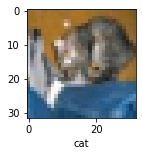

In [ ]:
plot_sample(X_test,y_test,0)

In [ ]:
y_preds = cnn.predict(X_test)
y_preds[:5]

array([[1.9284744e-03, 9.4578281e-06, 1.0711759e-02, 7.8587413e-01,
        4.2654417e-02, 9.4649866e-02, 5.7255853e-02, 4.4734366e-03,
        1.3197948e-03, 1.1227706e-03],
       [1.6968041e-04, 3.2258943e-02, 1.2240989e-07, 5.5248421e-07,
        5.1029274e-09, 4.9041038e-10, 8.5481663e-11, 3.8947306e-10,
        9.6748692e-01, 8.3780680e-05],
       [1.3220683e-01, 4.8981361e-02, 2.4909561e-02, 5.5373088e-03,
        1.4888095e-03, 2.2526587e-04, 4.3792292e-04, 2.0811022e-03,
        7.7139300e-01, 1.2738829e-02],
       [9.1432869e-01, 1.1542462e-02, 2.9861280e-03, 1.3617261e-03,
        6.0197734e-04, 1.9597497e-05, 7.0697342e-06, 1.9999437e-03,
        6.6914260e-02, 2.3822580e-04],
       [3.9239595e-07, 3.0485064e-06, 1.3818889e-02, 5.8235480e-03,
        1.4248528e-02, 8.2989031e-04, 9.6526796e-01, 4.4479621e-06,
        3.3746753e-06, 9.0607671e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_preds]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
classes[y_classes[0]]

'cat'